# Evolving Niches with Noise
## Noise-free runs after 300 generations

50 simulations of 300 generations were run with no noise on any channels

In [2]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -logging
%aimport -os


import analysis.ks
import dataframe.calculations.spectrum
from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [3]:
directory = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/20D17_nonoise_300x50/'

spectra = pd.read_parquet(os.path.join(directory, 'encoded_spectrum.parquet'))
species = pd.read_parquet(os.path.join(directory, 'species.parquet'))
subspecies = pd.read_parquet(os.path.join(directory, 'subspecies.parquet'))
fitness = pd.read_parquet(os.path.join(directory, 'fitness.parquet'))
individuals = pd.read_parquet(os.path.join(directory, 'individuals.parquet'))

last_10_species = specific_generation_over_runs(range(289,299), data=species)
run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
run_fitness = run_role_fitness.groupby('run').mean()

spectra_ob_fitness = spectra.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
spectra_ob_fitness = spectra_ob_fitness.drop(columns='fitness')

## Average of the 50 runs

The plot below shows the average spectrum of all 50 noisy simulations.
All channels are noise free.
In the first generations, the populations communicate on all 9 channels, but usage of the 3 noisy channels quickly drops off.

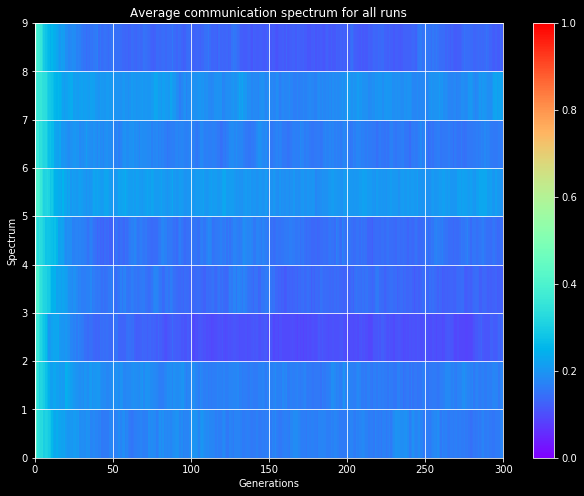

In [3]:
visualize.dataframe.plot_spectrum(spectra, vmin=0.0, vmax=1.0, view=True, filename=None)

## Individual Runs

It's important to see the variation in the individual runs as well.
The 50 runs are split between the two plots below showing 25 runs each.
The runs are labelled and ordered from left-to-right, top-to-bottom by fitness, with the first plot being the most fit and the last one being the least.

    Fitness is calculated as the average fitness over the last 10 generations of each run.
    This is to smooth variations in fitness caused by random mutations of the genomes in each population and to get a sense of what the steady-state fitness is.
    Average fitness is presented here because it is, for the purposes of these simulations, important that a whole population can commmunicate with each other.
    The most fit individual is irrelavent for these analyses.

By the end of 300 generations, most of the populations have settled on 3 channels to communicate on.
The channel selection is stable in most populations and hasn't changed in many generations.
Only a few populations towards the lower end of the fitness spectrum have used 2 channels and only run 32 has settled on a single channel for communication.
A full accounting of the final average fitnesses of the populations is shown in the chart below.


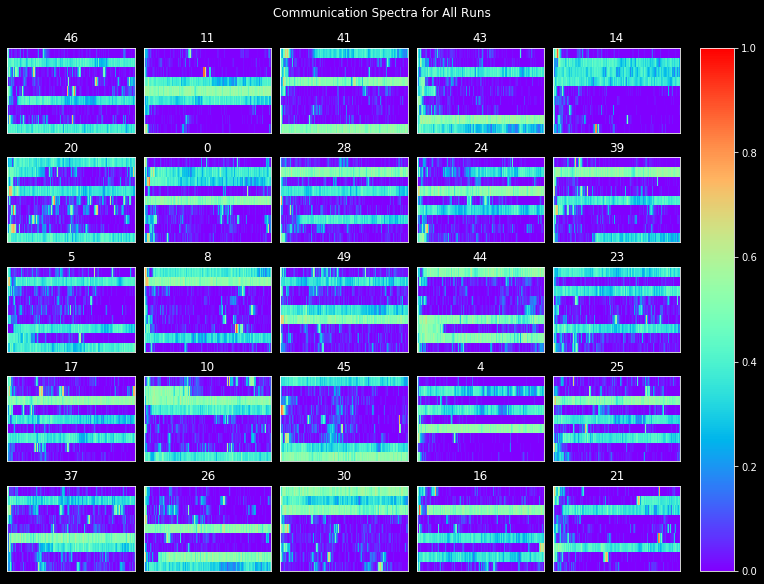

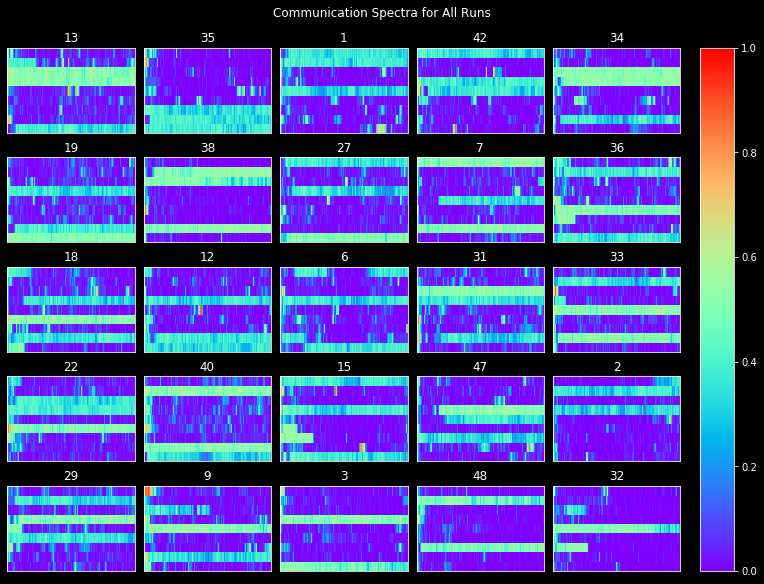

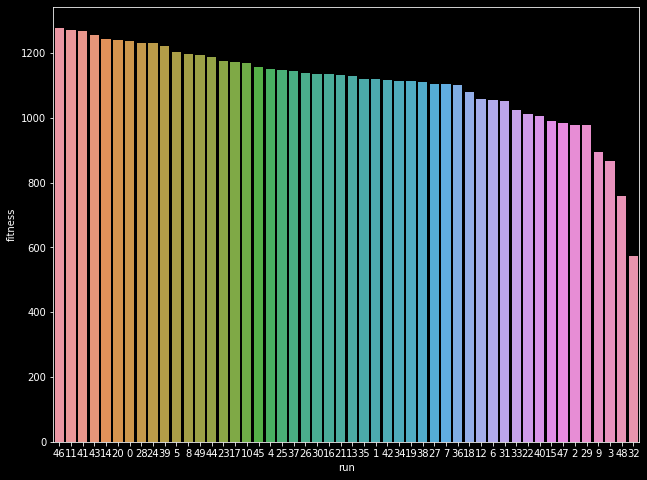

In [4]:
visualize.dataframe.plot_run_spectra(spectra_ob_fitness, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), numbering=True)

last_25 = spectra_ob_fitness.loc[spectra_ob_fitness.index.get_level_values('run').unique()[25:]]
visualize.dataframe.plot_run_spectra(last_25, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), numbering=True)

order = run_fitness.reset_index().sort_values('fitness', ascending=False)['run']
sns.barplot(x='run', y='fitness', order=order, data=run_fitness.reset_index())

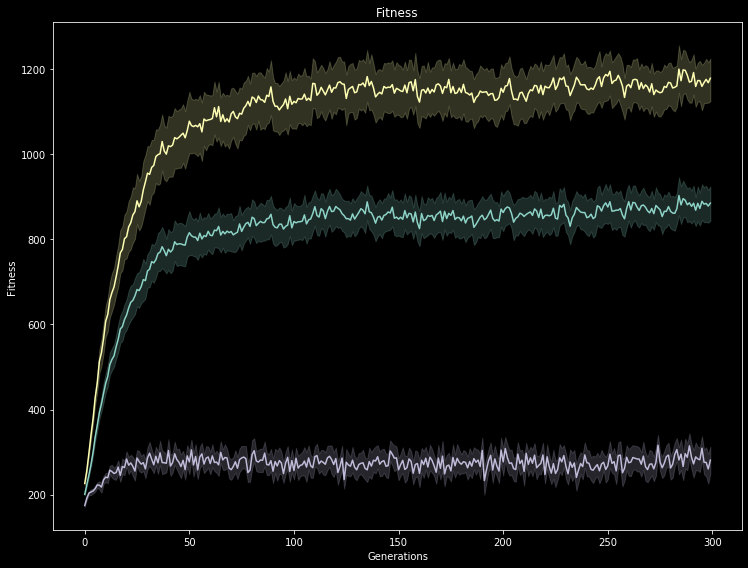

In [4]:
visualize.dataframe.plot_species_fitness(fitness, species=0, role='sender', view=True, filename=None)

## Runs 4, 5, and 25

I've highlighted runs 4, 5, and 25 because they are all used in the next phase of analysis.
Each serves as the base run, which is then evolved further under the addition of noise on channels 0-2.
The three runs are all in the higher end of the fitness range and reasonably stable over the last few generations.
The difference between them is the number of channels in the 0-2 range (where the noise will appear) that they use.

### Run 4
Run 4 is remarkably stable in its use of channels 3, 5, and 7.
We would not expect much to change from this state upon the addition of noise to channels 0-2.

### Run 5
Run 5 is quite stable in the last 50 or so generations, but it uses two channels --- 0 and 2 --- in the range that will become noisy.
We would expect quite a bit of disruption for this population under the coming noisy condition.
The fitness should drop significantly at first, upon the introduction of noise.
And eventually, we would expect the population to shift from using channels 0 and 2 to two of the open channels in the 3-8 range.

### Run 25
Run 25 is also quite stable in the last 50 generations.
It uses one channel, number 2, in the range that will become noisy.
We would expect a drop in fitness, though a smaller one than with run 5 and an eventual shift away from channel 2.

**TODO** plot average run fitness of the continuations of runs 4, 5, and 25 against each other.

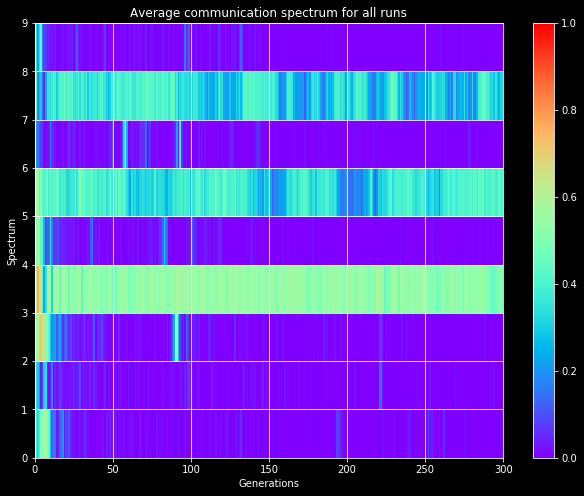

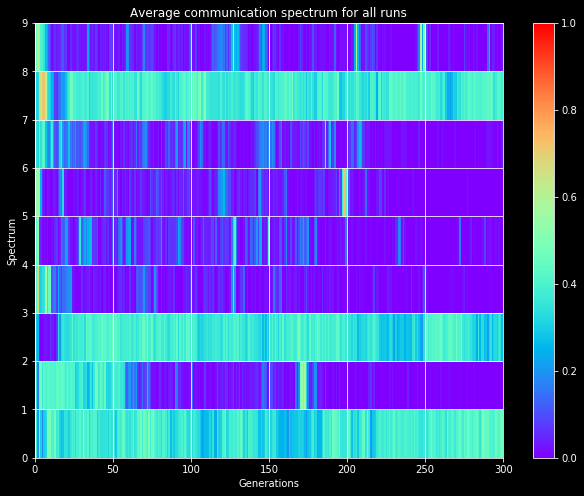

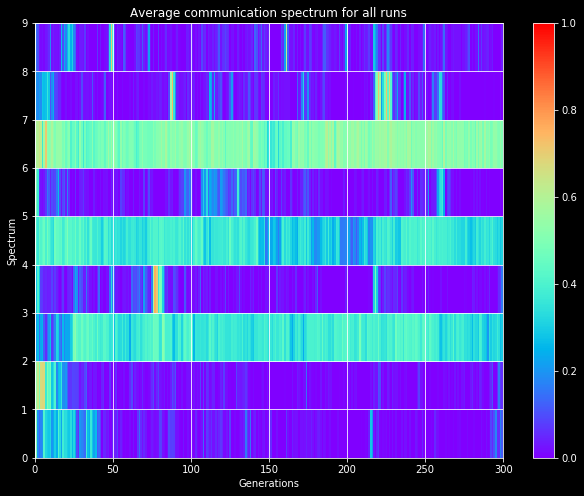

In [7]:
n = 4
run4 = spectra.loc[n]
visualize.dataframe.plot_spectrum(run4, vmin=0.0, vmax=1.0, view=True, filename=None)
# visualize.dataframe.plot_subspecies_abundances(subspecies, run=n, species=0, role='sender', view=True, sharex=ax)
# visualize.dataframe.plot_subspecies_fitness(subspecies, run=n, species=0, role='sender', view=True)
# visualize.dataframe.plot_subspecies_average_fitness(individuals, run=n, species=0, role='sender', view=True, filename=None)
# visualize.dataframe.plot_subspecies_fitness(subspecies, run=n, species=0, role='receiver', view=True, filename=None)
# visualize.dataframe.plot_subspecies_average_fitness(individuals, run=n, species=0, role='receiver', view=True, filename=None)

n = 5
run5 = spectra.loc[n]
visualize.dataframe.plot_spectrum(run5, vmin=0.0, vmax=1.0, view=True, filename=None)

n=25
run25 = spectra.loc[n]
visualize.dataframe.plot_spectrum(run25, vmin=0.0, vmax=1.0, view=True, filename=None)

## Channel volumes over the last 10 generations

ELABORATE

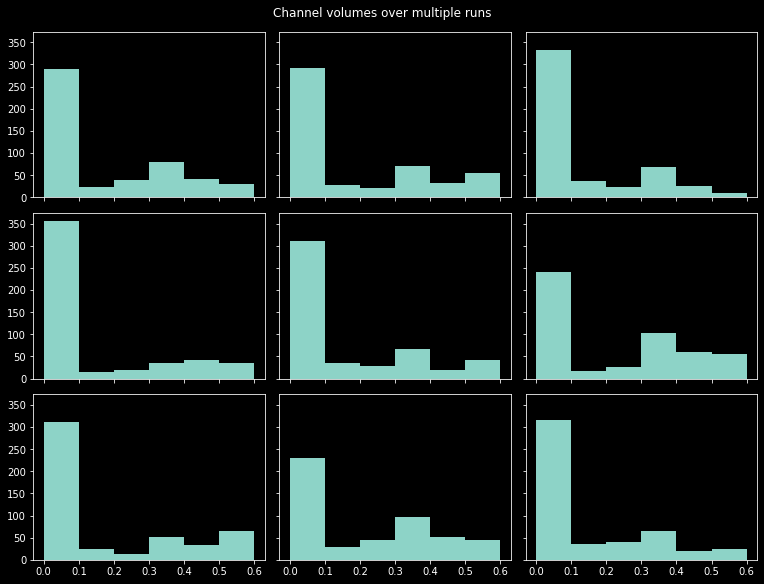

In [5]:
last10_spectra = specific_generation_over_runs(range(289,299), data=spectra)

visualize.dataframe.plot_channel_volume_histogram(last10_spectra, view=True, filename=None)

## KS Analysis

ELABORATE

In [6]:
ks_stat, ks_p = analysis.ks.kolmogorov_smirnov_matrix(last10_spectra)

stat_cluster_centers_indices, stat_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_stat)
p_cluster_centers_indices, p_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_p) 

[[0.    0.064 0.118 0.144 0.076 0.14  0.088 0.13  0.1  ]
 [0.064 0.    0.128 0.15  0.078 0.134 0.046 0.14  0.118]
 [0.118 0.128 0.    0.094 0.098 0.234 0.134 0.228 0.052]
 [0.144 0.15  0.094 0.    0.12  0.234 0.13  0.256 0.082]
 [0.076 0.078 0.098 0.12  0.    0.202 0.088 0.192 0.072]
 [0.14  0.134 0.234 0.234 0.202 0.    0.166 0.056 0.232]
 [0.088 0.046 0.134 0.13  0.088 0.166 0.    0.178 0.122]
 [0.13  0.14  0.228 0.256 0.192 0.056 0.178 0.    0.194]
 [0.1   0.118 0.052 0.082 0.072 0.232 0.122 0.194 0.   ]]
[[0.     0.2576 0.0019 0.0001 0.1114 0.0001 0.0416 0.0004 0.0134]
 [0.2576 0.     0.0005 0.     0.0955 0.0002 0.6659 0.0001 0.0019]
 [0.0019 0.0005 0.     0.0241 0.0164 0.     0.0002 0.     0.5089]
 [0.0001 0.     0.0241 0.     0.0015 0.     0.0004 0.     0.0693]
 [0.1114 0.0955 0.0164 0.0015 0.     0.     0.0416 0.     0.1497]
 [0.0001 0.0002 0.     0.     0.     0.     0.     0.4135 0.    ]
 [0.0416 0.6659 0.0002 0.0004 0.0416 0.     0.     0.     0.0012]
 [0.0004 0.0001 0.     0

/Users/davk/anaconda/envs/EvolvingNiches38/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:225: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
